In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) 

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
#Standard python library. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

# Data

In [18]:
#reads a table of data given country by country.
df=pd.read_csv("df.csv")
df.head()

,country,gdp_pc_pp,pop
0,Afghanistan,1883.763321,30551674
1,Albania,9960.940726,2897366
2,Algeria,12892.942490,39208194
3,Angola,7488.011760,21471618
4,Antigua and Barbuda,20353.290820,89985


The previous table indexes country by their names.
The following table matches country names (rendered in different ways and with differents spellings) to ISO code.

In [30]:
spellings_to_iso = pd.read_csv("https://github.com/adrivsh/country_names/raw/master/names_to_iso.csv", 
            index_col="country", usecols=["country","iso3"], squeeze=True)
spellings_to_iso.head()

country
Afghanistan      AFG
Aland Islands    ALA
Aland            ALA
Albania          ALB
Algeria          DZA
Name: iso3, dtype: object

In [31]:
from replace_with_warning import replace_with_warning

In [32]:
df["ISO"]=replace_with_warning(df.country,spellings_to_iso)
df=df.set_index("ISO")
df.head()

,country,gdp_pc_pp,pop
ISO,,,
AFG,Afghanistan,1883.763321,30551674
ALB,Albania,9960.940726,2897366
DZA,Algeria,12892.942490,39208194
AGO,Angola,7488.011760,21471618
ATG,Antigua and Barbuda,20353.290820,89985


## Mapping libraries

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, provided the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).




In [22]:
from maps_lib import * 

In [23]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

## Formating options

The [blank map of the World](world.svg) we use here is an SVG.

In [24]:
# path to the blank map 
svg_file_path = "world.svg"

## Example with binned data (recommended)

Here we bin the data in rough quantiles, using human-readable values

In [26]:
df.gdp_pc_pp.quantile([0,.2,.4,.6,.8,1])

0.0       584.375944
0.2      2879.603057
0.4      7507.119320
0.6     15183.984168
0.8     28682.222816
1.0    138024.906700
Name: gdp_pc_pp, dtype: float64

In [27]:
mybins   = [580, 3000, 7500, 15000, 30000,140000]
#we chose bins thare are close to the actual quatiles but make sense when reading by a human

mycolors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
# colors choses from http://colorbrewer2.org

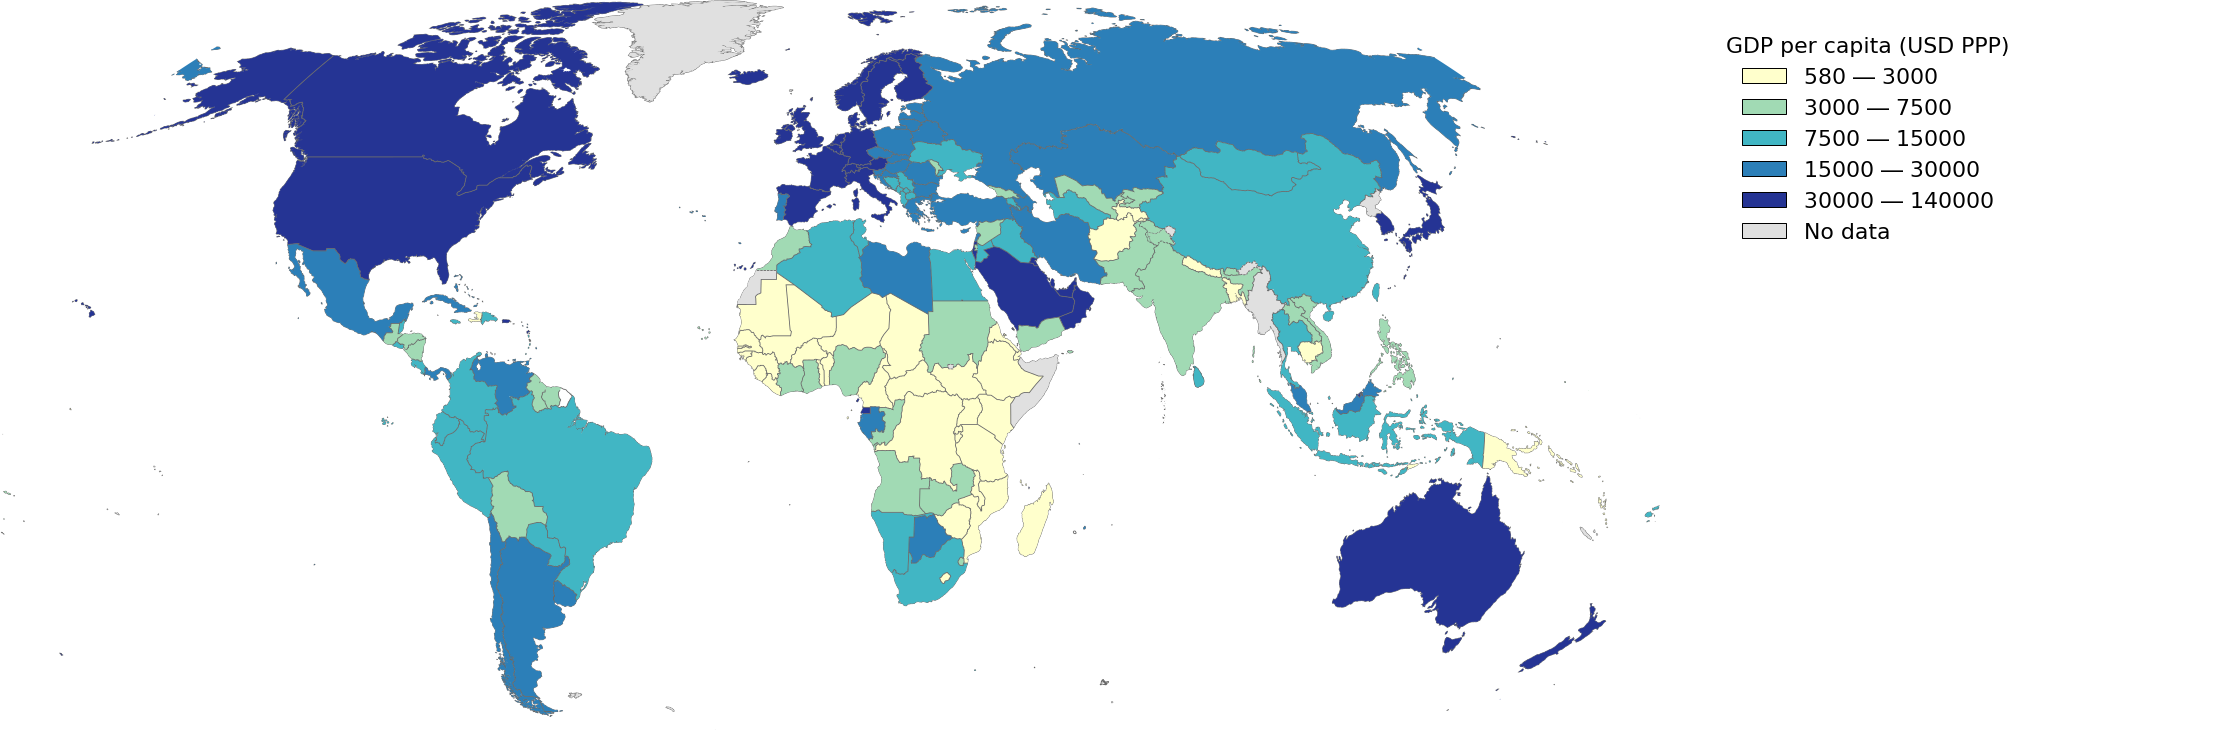

In [28]:
make_map_from_svg(
    series_in=df.gdp_pc_pp, #data 
    svg_file_path=svg_file_path,                  #path to blank map
    outname="GDP_pc",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
    label="GDP per capita (USD PPP)",
    new_title="Map of GDP per capita",#title for the colored SVG
    outfolder="",
    bins   = mybins,
    bincolors = mycolors,
    verbose=True
)

## Example with non-binned data (not recommended)

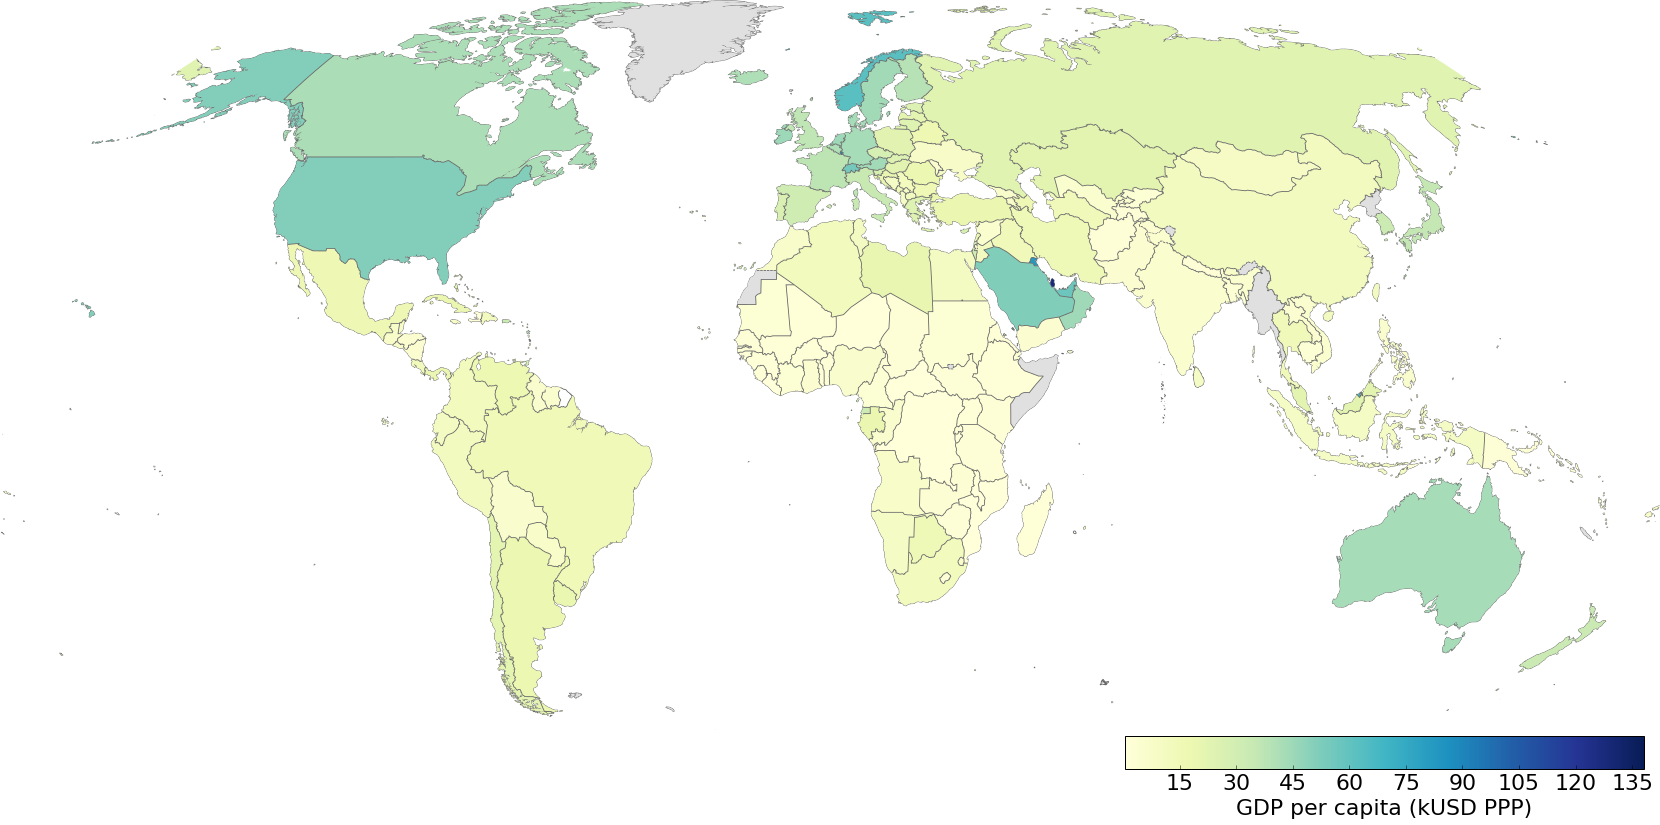

In [29]:
make_map_from_svg(
    series_in=df.gdp_pc_pp*1e-3, #data 
    svg_file_path=svg_file_path,                  #path to blank map
    outname="GDP_pc_nobin",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
    color_maper=plt.cm.get_cmap("YlGnBu"), #color scheme (from matplotlib. Chose them from http://colorbrewer2.org/)
    label="GDP per capita (kUSD PPP)",
    new_title="Map of GDP per capita (no bin)",#title for the colored SVG
    outfolder="",
    verbose=True
)